In [1]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [2]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from catboost import Pool
from catboost import CatBoostRegressor
import warnings

In [3]:
data = pd.read_csv(r"C:\Users\aalimov002\Desktop\data_with_clusters.csv")
data=data.drop(['Unnamed: 0', 'Position'],axis=1)
data['Foot'] = data['Foot'].replace('right', 1)
data['Foot'] = data['Foot'].replace('left', 0)
data['Foot'] = data['Foot'].replace('both', 2)
#data=data[data['Transfer_value']<15000000]
Player = data['Player']
data=data.drop(['Player'],axis=1)
target = data['Transfer_value']
data = data.drop(['Transfer_value'],axis=1)
data=data.astype('int')

In [4]:
data=data.drop(['Assists per 90', 'Foot', 'Shots blocked per 90','Goals per 90','Non-penalty goals per 90','Key passes per 90',
               'Head goals per 90', 'Yellow cards per 90','forward_passes_pagerank','Third assists per 90',
               'Second assists per 90','Red cards per 90','progressive_passes_closeness','long_passes_pagerank'],axis=1)

In [5]:
for i in range(0, data.shape[1]):
    data.iloc[:,i]= data.iloc[:,i] + 0.0000001
    data.iloc[:,i] = (data.iloc[:,i] - data.iloc[:,i].mean() ) / np.std(data.iloc[:,i])

    
target = np.log(target)    

In [6]:
model=CatBoostRegressor()
model = model.load_model(r"C:\Users\aalimov002\Desktop\vizual\catboost_model.bin")

predictions=model.predict(data)

In [7]:
shap_values = model.get_feature_importance(Pool(data, target), type='ShapValues')
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]



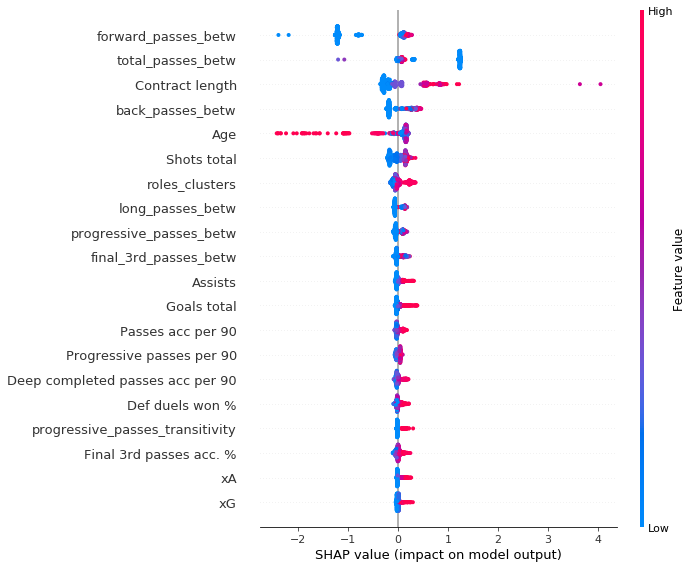

In [10]:
shap.summary_plot(shap_values, data)

In [19]:
shap.force_plot(expected_value, shap_values, data)

In [8]:
shap.initjs()
shap.force_plot(expected_value, shap_values[0,:], data.iloc[1,:])

In [11]:
check = pd.DataFrame(Player)
check['initial'] = target
check['pred'] = predictions
check['initial'] = np.exp(check['initial'])
check['pred'] = np.exp(check['pred'])
check['diff'] = abs(check['initial'] - check['pred'])

In [15]:
check[check['Player']=='A. Dzyuba']

Player     initial          pred           diff
23  A. Dzyuba  16000000.0  1.583474e+07  165260.658016

Chalov 280 
Dzyuba 23
Shomurodov 273
Promes 553


## Shomurodov

In [32]:
shap.force_plot(
    expected_value,
    shap_values[23,:],
    feature_names=data.columns
)

## Chalov

In [21]:
shap.force_plot(
    expected_value,
    shap_values[273:],
    feature_names=data.columns
)